# My attempt at Case Study 2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

In [5]:
# Read in the csv data into a data frame
df = pd.read_csv('./CaseStudyFiles/colored_ad_click_table.csv')

In [6]:
print(df.shape)

(30, 41)


In [7]:
print(df.Color.values)

['Pink' 'Gray' 'Sapphire' 'Purple' 'Coral' 'Olive' 'Navy' 'Maroon' 'Teal'
 'Cyan' 'Orange' 'Black' 'Tan' 'Red' 'Blue' 'Brown' 'Turquoise' 'Indigo'
 'Gold' 'Jade' 'Ultramarine' 'Yellow' 'Virdian' 'Violet' 'Green'
 'Aquamarine' 'Magenta' 'Silver' 'Bronze' 'Lime']


In [8]:
print(df)

          Color  Click Count: Day 1  View Count: Day 1  Click Count: Day 2  \
0          Pink                  21                100                  20   
1          Gray                  27                100                  27   
2      Sapphire                  30                100                  32   
3        Purple                  26                100                  21   
4         Coral                  26                100                  24   
5         Olive                  26                100                  19   
6          Navy                  38                100                  29   
7        Maroon                  21                100                  29   
8          Teal                  25                100                  25   
9          Cyan                  24                100                  22   
10       Orange                  13                100                  28   
11        Black                  27                100          

In [9]:
print(df.values)

[['Pink' 21 100 ... 100 20 100]
 ['Gray' 27 100 ... 100 24 100]
 ['Sapphire' 30 100 ... 100 25 100]
 ...
 ['Silver' 26 100 ... 100 20 100]
 ['Bronze' 19 100 ... 100 18 100]
 ['Lime' 20 100 ... 100 18 100]]


In [10]:
# Transpose the table to turn the rows into columns and turn the Blue column into a numpy array
colors = df.Color.values
df_transposed = df.transpose().set_axis(colors, axis=1)
print(df_transposed)

                     Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon  \
Color                Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon   
Click Count: Day 1     21    27        30      26     26     26    38      21   
View Count: Day 1     100   100       100     100    100    100   100     100   
Click Count: Day 2     20    27        32      21     24     19    29      29   
View Count: Day 2     100   100       100     100    100    100   100     100   
Click Count: Day 3     14    26        30      16     25     20    30      24   
View Count: Day 3     100   100       100     100    100    100   100     100   
Click Count: Day 4     30    17        26      17     27     23    32      22   
View Count: Day 4     100   100       100     100    100    100   100     100   
Click Count: Day 5     12    29        32      23     36     27    29      22   
View Count: Day 5     100   100       100     100    100    100   100     100   
Click Count: Day 6     23   

In [11]:
# Finding the index of blue:
print(np.where(colors == 'Blue')[0][0])

14


In [12]:
# Turn column 14 into an ndarray:
print(df_transposed.Blue.values)

['Blue' 29 100 30 100 27 100 27 100 42 100 33 100 29 100 18 100 27 100 21
 100 28 100 24 100 27 100 30 100 39 100 26 100 31 100 31 100 23 100 25 100]


In [13]:
# Getting rid of the first row of colors as it will screw with later calculations if left
df_transposed.tail(-1)
print(df_transposed)

                     Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon  \
Color                Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon   
Click Count: Day 1     21    27        30      26     26     26    38      21   
View Count: Day 1     100   100       100     100    100    100   100     100   
Click Count: Day 2     20    27        32      21     24     19    29      29   
View Count: Day 2     100   100       100     100    100    100   100     100   
Click Count: Day 3     14    26        30      16     25     20    30      24   
View Count: Day 3     100   100       100     100    100    100   100     100   
Click Count: Day 4     30    17        26      17     27     23    32      22   
View Count: Day 4     100   100       100     100    100    100   100     100   
Click Count: Day 5     12    29        32      23     36     27    29      22   
View Count: Day 5     100   100       100     100    100    100   100     100   
Click Count: Day 6     23   

In [14]:
# delete all view count columns since it is always 100
view_columns = [column for column in df.columns if 'View' in column]
print(view_columns)

['View Count: Day 1', 'View Count: Day 2', 'View Count: Day 3', 'View Count: Day 4', 'View Count: Day 5', 'View Count: Day 6', 'View Count: Day 7', 'View Count: Day 8', 'View Count: Day 9', 'View Count: Day 10', 'View Count: Day 11', 'View Count: Day 12', 'View Count: Day 13', 'View Count: Day 14', 'View Count: Day 15', 'View Count: Day 16', 'View Count: Day 17', 'View Count: Day 18', 'View Count: Day 19', 'View Count: Day 20']


In [15]:
# Drop the redundant view count rows:
df_final = df_transposed.drop(view_columns)

# Drop the redundant Color row
df_final = df_final.drop('Color')
print(df_final)

                    Pink Gray Sapphire Purple Coral Olive Navy Maroon Teal  \
Click Count: Day 1    21   27       30     26    26    26   38     21   25   
Click Count: Day 2    20   27       32     21    24    19   29     29   25   
Click Count: Day 3    14   26       30     16    25    20   30     24   32   
Click Count: Day 4    30   17       26     17    27    23   32     22   28   
Click Count: Day 5    12   29       32     23    36    27   29     22   25   
Click Count: Day 6    23   27       29     17    30    11   22     23   24   
Click Count: Day 7    26   19       21     21    36    24   29     22   31   
Click Count: Day 8    21   21       26     30    31    18   30     16   28   
Click Count: Day 9    16   28       28     15    31    22   25     26   29   
Click Count: Day 10   21   24       27     26    26    29   23     26   27   
Click Count: Day 11   21   23       33     17    37    26   26     17   33   
Click Count: Day 12   16   21       22     20    25    24   30  

Initial mean difference is 7.800000000000001


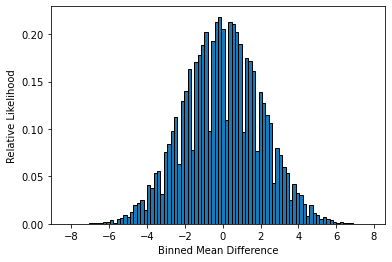

In [16]:
# Run a permutation test on Blue and Pink to test knowledge
blue_data = df_final.Blue.values
pink_data = df_final.Pink.values

# initial mean difference (used as extreme to calculate p-value)
initial_diff = abs(blue_data.mean() - pink_data.mean())
print(f"Initial mean difference is {initial_diff}")

combined_data = np.hstack([blue_data, pink_data])


np.random.seed(0)
mean_diffs = []
for _ in range(30000):
    np.random.shuffle(combined_data)
    mean_diff = combined_data[:20].mean() - combined_data[20:].mean()
    mean_diffs.append(mean_diff)
    
likelihoods, bin_edges, _ = plt.hist(mean_diffs, bins='auto', edgecolor='k', density=True)
plt.xlabel('Binned Mean Difference')
plt.ylabel('Relative Likelihood')
plt.show()

In [17]:
# Computing the permutation p-value from direct counts
num_extreme_values = 0.0
for min_diff in mean_diffs:
    if abs(min_diff) >= initial_diff:
        num_extreme_values += 1
        
p_value = num_extreme_values / len(mean_diffs)
print(f"P-value is {p_value}")

P-value is 6.666666666666667e-05


In [18]:
# Just have to write a function to run a permutation test on two arrays, which is done in the solution, so I will 
# just go through the solution, as I know how to run my own permutation test

# Case Study 2 Solution

In [35]:
# 9.1 Processing the ad-click table in Pandas
# Loading the ad-click table into Pandas
df = pd.read_csv('./CaseStudyFiles/colored_ad_click_table.csv')
num_rows, num_cols = df.shape
print(f"Table contains {num_rows} rows and {num_cols} columns.")

Table contains 30 rows and 41 columns.


In [36]:
# Checking the column names
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

In [37]:
print(df.Color.values)

['Pink' 'Gray' 'Sapphire' 'Purple' 'Coral' 'Olive' 'Navy' 'Maroon' 'Teal'
 'Cyan' 'Orange' 'Black' 'Tan' 'Red' 'Blue' 'Brown' 'Turquoise' 'Indigo'
 'Gold' 'Jade' 'Ultramarine' 'Yellow' 'Virdian' 'Violet' 'Green'
 'Aquamarine' 'Magenta' 'Silver' 'Bronze' 'Lime']


In [38]:
# Checking for blue
assert 'Blue' in df.Color.values

In [39]:
# Summarizing day 1 of the experiment
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
print(df[selected_columns].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            23.533333              100.0
std              7.454382                0.0
min             12.000000              100.0
25%             19.250000              100.0
50%             24.000000              100.0
75%             26.750000              100.0
max             49.000000              100.0


In [40]:
# Confirming equivalent daily views
view_columns = [column for column in df.columns if 'View' in column]
assert np.all(df[view_columns].values == 100)

In [41]:
df.drop(columns=view_columns, inplace=True)
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


In [42]:
# Summarizing daily blue-click statistics
df.set_index('Color', inplace=True)

# Set rows to be the color names
# .T transposes so now the color names are the columns names rather than row indexes
# Select blue
# Describe it
print(df.T.Blue.describe())

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64


In [43]:
# 9.2 Computing p-values from differences in means
# Creating a no-blue table
df_not_blue = df.T.drop(columns='Blue')
print(df_not_blue.head(2))

Color               Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon  \
Click Count: Day 1    21    27        30      26     26     26    38      21   
Click Count: Day 2    20    27        32      21     24     19    29      29   

Color               Teal  Cyan  ...  Ultramarine  Yellow  Virdian  Violet  \
Click Count: Day 1    25    24  ...           49      14       27      15   
Click Count: Day 2    25    22  ...           41      24       23      22   

Color               Green  Aquamarine  Magenta  Silver  Bronze  Lime  
Click Count: Day 1     14          24       18      26      19    20  
Click Count: Day 2     25          28       21      24      19    19  

[2 rows x 29 columns]


In [44]:
# Defining a permutation test function
def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean()) >= extreme_mean_diff:
            number_extreme_values += 1
            
    p_value = number_extreme_values / 30000
    return p_value

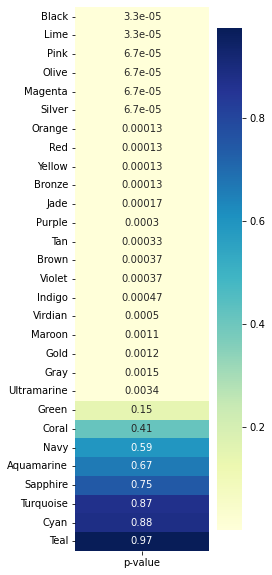

In [45]:
# Running a permutation test across colors
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value
    
# Efficient Python code to sort a dictionary and return two lists: a list of sorted vaues and a list of associated keys
# Each sorted p-value at position i aligns with the color in sorted_colors[i]
sorted_colors, sorted_p_values = zip(*(sorted(color_to_p_value.items(), key=lambda x: x[1])))

# Plot the results with a heatmap
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values], cmap="YlGnBu", annot=True, 
            xticklabels=['p-value'], yticklabels=sorted_colors)
plt.show()

In [46]:
# Finding the mean click rate of black
mean_black = df_not_blue.Black.mean()
print(f"Mean click-rate of black is {mean_black}")

Mean click-rate of black is 21.6


In [47]:
# Filtering colors with inferior click rates
# Efficeint one-line code to filter the colors
# First, the code creates a Boolean array. The array specifies which colors contain a mean greater than blue.
# The Boolean array is fed into df for filtering.
# The indices of the filtered result specify the remaining color names
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size
print(f"{size} colors have on average more clacks than Blue.")
print("These colors are:")
print(remaining_colors.values)

5 colors have on average more clacks than Blue.
These colors are:
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


In [48]:
# Printing the five remaining colors
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_colors:
        mean = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 0.0034 and a mean of 34.2
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2
Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Teal has a p-value of 0.9745 and a mean of 28.45


In [49]:
# 9.3 Determining statistical significance
# Applying the Bonferroni correction
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}")
if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant


In [50]:
# Exploring a hypothetical significance level
hypothetical_sig_level = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_level}")
if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
    print(f"Our hypothetical p-value would have been statistically significant")
else:
    print(f"Our hypothetical p-value would not have been statistically significant")

Hypothetical significance level is 0.01
Our hypothetical p-value would have been statistically significant


In [51]:
# 9.4 41 shades of blue: A real-life cautioary tale
# More data can sometimes lead to more uncertainty

In [52]:
# Key Words / Notes:
# More data isn't always better; running more tests than needed increases the chance of anomalous results
# It's worth taking the time to think about a probem before running an analysis
#     (some of the 31 colors would have made awful link colors)
# Sometimes good insights can still be possible with flawed data